In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../data/xpto_sales_products_mar_may_2024.csv - Página4.csv"
data = pd.read_csv(file_path)

data.head()

,sale_date,product_id,product_title,product_price,product_image_url,store_name,store_id,sales_per_day
0,2024-04-15,4,Smart TV LG 55',643.06,https://www.lorempixel.com/204/274,Submarino,20,20
1,2024-03-22,25,Panela de Pressão Elétrica Mondial,39.20,https://placekitten.com/24/140,Submarino,20,19
2,2024-05-13,18,Máquina de Lavar Roupas Brastemp,233.34,https://dummyimage.com/733x611,Submarino,20,18
3,2024-03-15,22,Micro-ondas Panasonic,869.06,https://placekitten.com/541/532,Submarino,20,18
4,2024-04-18,36,Home Theater Sony,11.13,https://placekitten.com/34/283,Submarino,20,18


In [52]:
data.columns

Index(['sale_date', 'product_id', 'product_title', 'product_price',
       'product_image_url', 'store_name', 'store_id', 'sales_per_day', 'month',
       'price_range', 'cluster'],
      dtype='object')

In [16]:
data['sale_date'] = pd.to_datetime(data['sale_date'])

In [18]:
data.describe()

,sale_date,product_id,product_price,store_id,sales_per_day
count,800,800.000000,800.000000,800.000000,800.000000
mean,2024-04-16 18:30:36,24.578750,500.241037,10.156250,10.293750
min,2024-03-01 00:00:00,1.000000,8.350000,1.000000,1.000000
25%,2024-03-25 00:00:00,12.000000,262.207500,5.000000,5.000000
50%,2024-04-18 00:00:00,24.000000,482.800000,10.000000,10.000000
75%,2024-05-08 00:00:00,36.250000,738.187500,15.000000,15.000000
max,2024-05-30 00:00:00,49.000000,1249.640000,20.000000,20.000000
std,NaN,14.055898,309.585621,5.854672,5.791968


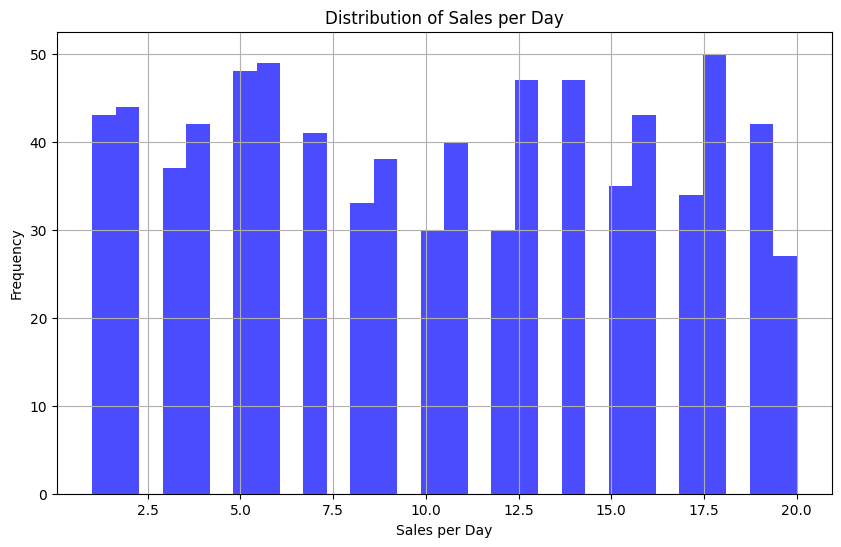

In [19]:
# Distribuição das vendas por dia

# Explicação:
# O gráfico de histograma ajuda a visualizar a distribuição das vendas por dia.
# É possível identificar se há um número elevado de produtos com poucas vendas ou 
# se existem produtos com vendas significativas de forma consistente.

plt.figure(figsize=(10, 6))
plt.hist(data['sales_per_day'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Sales per Day')
plt.xlabel('Sales per Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

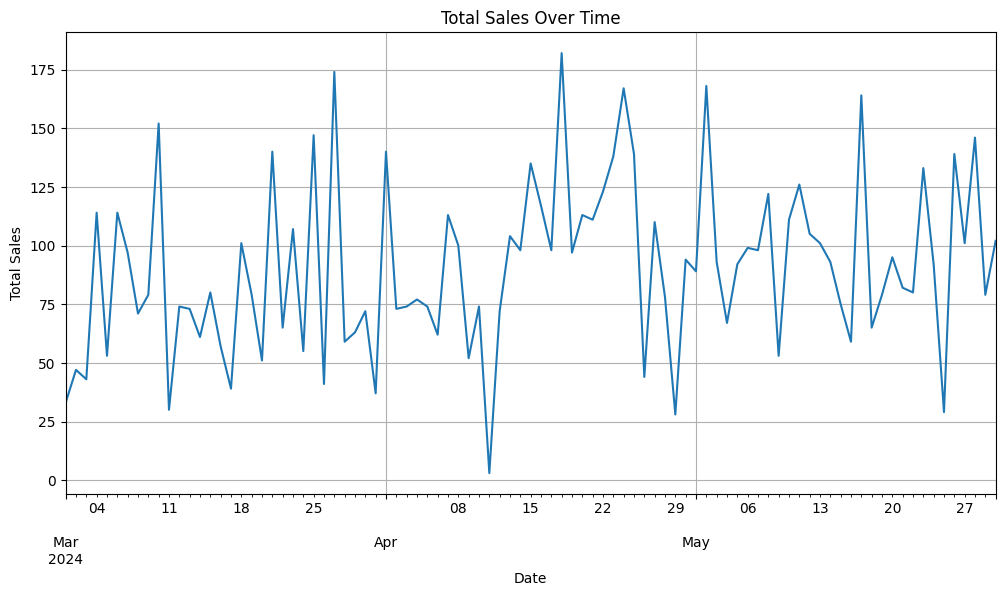

In [20]:
# Total de vendas ao longo do tempo

# Explicação:
# Este gráfico mostra a variação das vendas totais ao longo do tempo. 
# Ele é útil para identificar picos ou quedas significativas em determinados dias.

sales_over_time = data.groupby('sale_date')['sales_per_day'].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

C:\Users\Lazar\AppData\Local\Temp\ipykernel_16364\2981506379.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price_range = data.groupby(['price_range', 'sale_date'])['sales_per_day'].sum().reset_index()


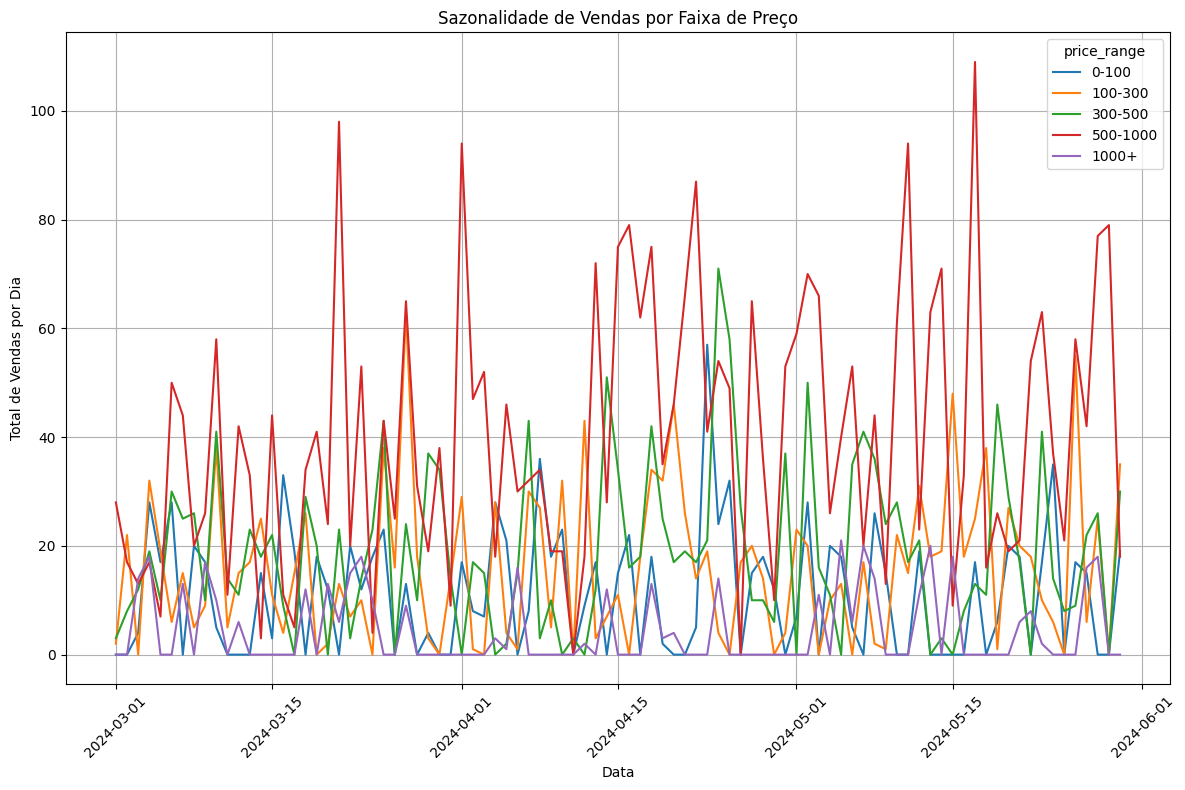

In [47]:
# Categorizar os produtos em faixas de preço para análise de sazonalidade

price_bins = [0, 100, 300, 500, 1000, 1500]
price_labels = ['0-100', '100-300', '300-500', '500-1000', '1000+']
data['price_range'] = pd.cut(data['product_price'], bins=price_bins, labels=price_labels)

# Agrupar vendas por faixa de preço e data

sales_by_price_range = data.groupby(['price_range', 'sale_date'])['sales_per_day'].sum().reset_index()

# Analisar sazonalidade de vendas por faixa de preço

# Explicação:
# Aqui, categorizei os produtos em diferentes faixas de preço e analisei as vendas por dia para cada faixa.
# Isso permite observar a sazonalidade de vendas em cada categoria de preço.

plt.figure(figsize=(12, 8))
sns.lineplot(x='sale_date', y='sales_per_day', hue='price_range', data=sales_by_price_range)
plt.title('Sazonalidade de Vendas por Faixa de Preço')
plt.xlabel('Data')
plt.ylabel('Total de Vendas por Dia')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

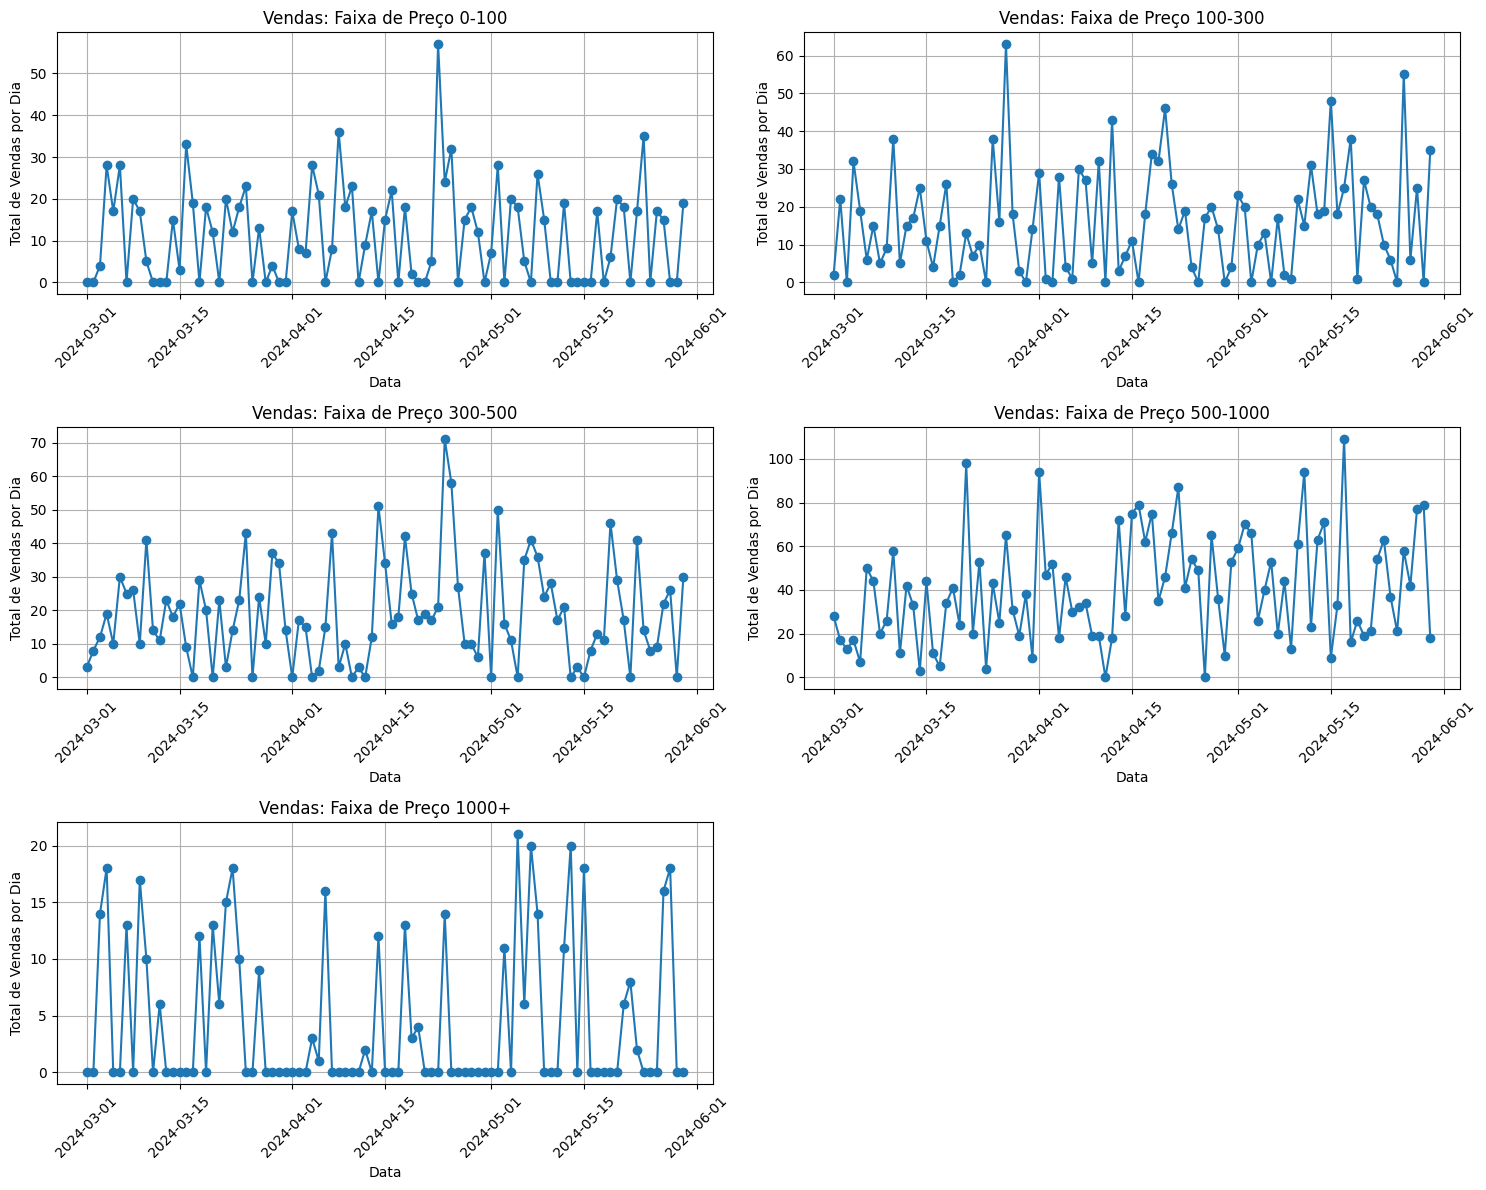

In [48]:
# Plotar vendas por faixa de preço em gráficos separados

# Explicação:
# Para tornar mais fácil a visualização da sazonalidade em cada faixa de preço,
# plotei gráficos individuais, o que facilita a identificação de picos e quedas específicas.

plt.figure(figsize=(15, 12))

for i, price_range in enumerate(price_labels):
    plt.subplot(3, 2, i+1)
    price_data = sales_by_price_range[sales_by_price_range['price_range'] == price_range]
    plt.plot(price_data['sale_date'], price_data['sales_per_day'], label=price_range, marker='o')
    plt.title(f'Vendas: Faixa de Preço {price_range}')
    plt.xlabel('Data')
    plt.ylabel('Total de Vendas por Dia')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\Lazar\AppData\Local\Temp\ipykernel_16364\2421368316.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price_range['sales_pct_change'] = sales_by_price_range.groupby('price_range')['sales_per_day'].pct_change() * 100


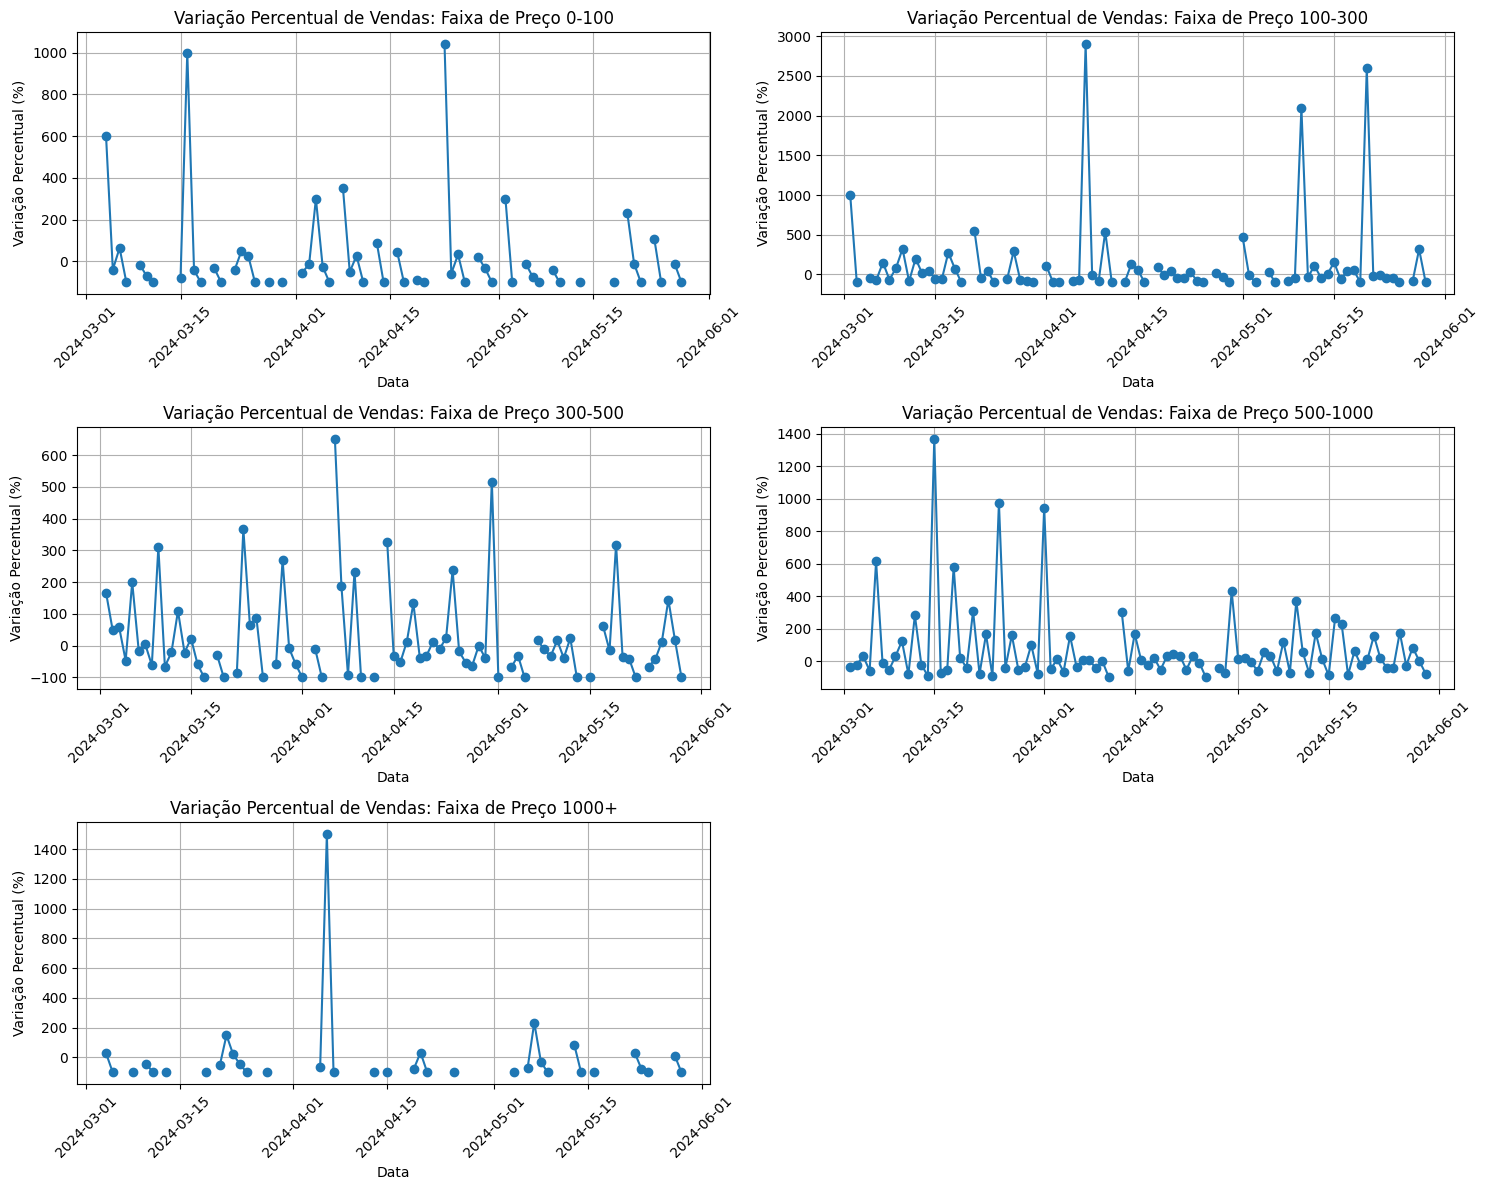

In [49]:
# Calcular a variação percentual das vendas por faixa de preço

sales_by_price_range['sales_pct_change'] = sales_by_price_range.groupby('price_range')['sales_per_day'].pct_change() * 100

# Plotar a variação percentual das vendas em gráficos separados

# Explicação:
# Aqui, calculei a variação percentual das vendas por faixa de preço ao longo do tempo.
# Esse gráfico ajuda a identificar picos de demanda ou quedas súbitas em cada categoria de produto.


plt.figure(figsize=(15, 12))

for i, price_range in enumerate(price_labels):
    plt.subplot(3, 2, i+1) 
    price_data = sales_by_price_range[sales_by_price_range['price_range'] == price_range]
    plt.plot(price_data['sale_date'], price_data['sales_pct_change'], label=price_range, marker='o')
    plt.title(f'Variação Percentual de Vendas: Faixa de Preço {price_range}')
    plt.xlabel('Data')
    plt.ylabel('Variação Percentual (%)')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


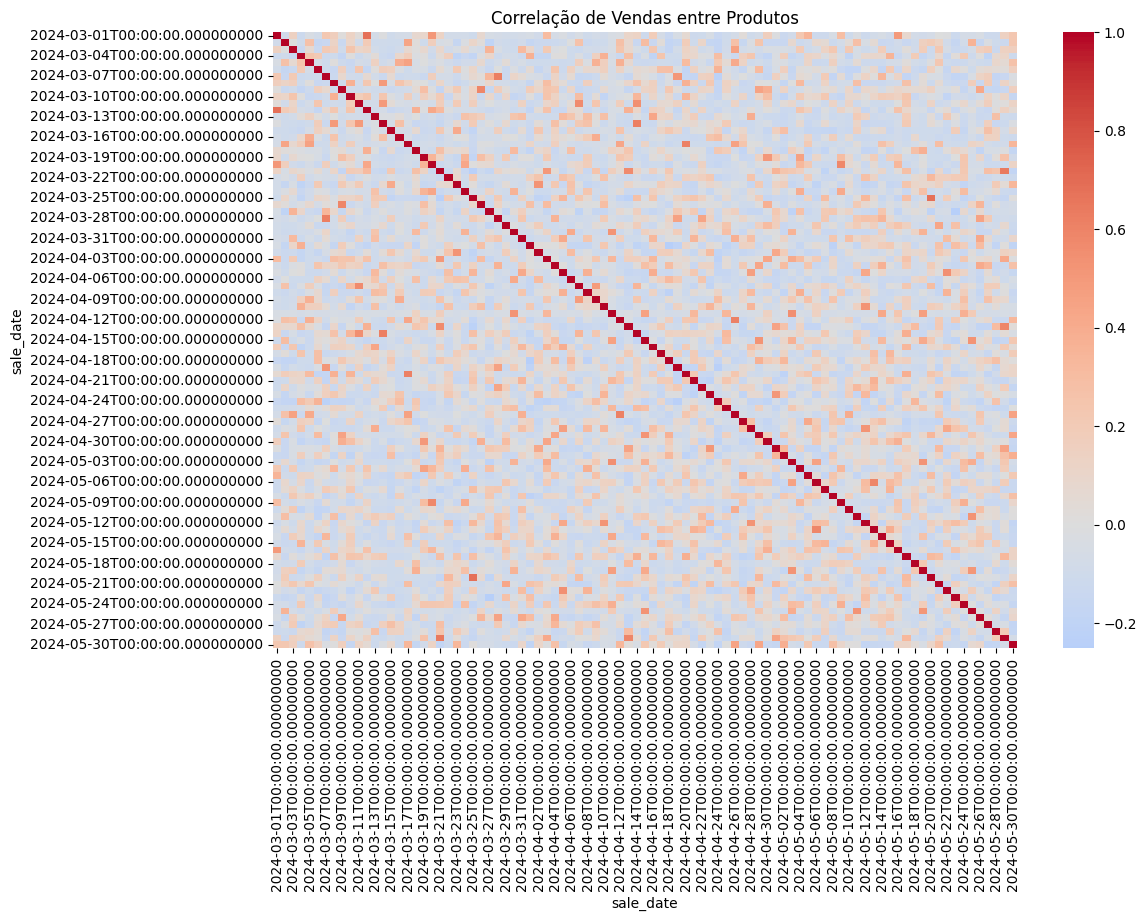

In [50]:
# Criar matriz de vendas para análise de correlação entre produtos

sales_pivot = data.pivot_table(index='product_id', columns='sale_date', values='sales_per_day', fill_value=0)

# Calcular correlação entre produtos com base nas vendas

product_correlation = sales_pivot.corr()

# Plotar matriz de correlação entre produtos
# Explicação:
# Este gráfico de calor exibe a correlação entre os produtos com base nas vendas.
# Produtos com alta correlação podem ser recomendados juntos no sistema de recomendação.

plt.figure(figsize=(12, 8))
sns.heatmap(product_correlation, cmap="coolwarm", center=0)
plt.title('Correlação de Vendas entre Produtos')
plt.show()

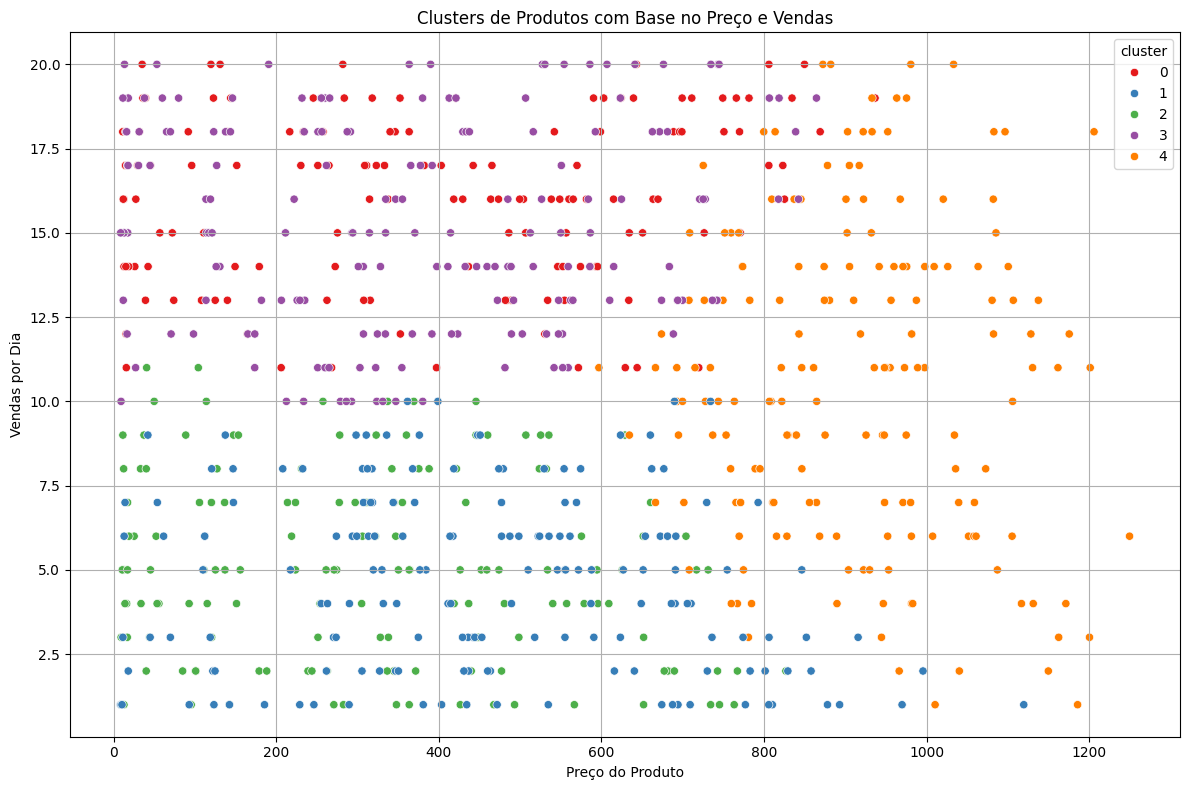

In [51]:
# Explicação:
# O algoritmo KMeans foi utilizado para agrupar os produtos com base no preço, vendas por dia e loja.
# Isso permite que o sistema de recomendação identifique produtos semelhantes e recomende itens do mesmo cluster.


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = data[['product_price', 'sales_per_day', 'store_id']].dropna()

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='product_price', y='sales_per_day', hue='cluster', data=data, palette='Set1')
plt.title('Clusters de Produtos com Base no Preço e Vendas')
plt.xlabel('Preço do Produto')
plt.ylabel('Vendas por Dia')
plt.grid(True)
plt.tight_layout()
plt.show()

## Justificativa para a Escolha do Algoritmo de Recomendação

A análise dos dados de vendas revela uma dinâmica rica em variações temporais e flutuações significativas no comportamento de vendas dos produtos, com picos abruptos.

**Variações Temporais e Sazonalidade**

Os gráficos de vendas totais ao longo do tempo e a sazonalidade por faixa de preço deixam claro que as vendas de produtos não seguem uma trajetória linear ou estável. Em vez disso, observamos picos e quedas regulares, sugerindo a existência de fatores externos — como promoções, eventos sazonais ou mesmo comportamento de consumo imprevisível — que geram variações abruptas. Essa sazonalidade está presente em praticamente todas as faixas de preço, com intensidade maior ou menor dependendo da categoria analisada.

Produtos de Preço Baixo (0-300): Mostram uma sazonalidade mais estável, com picos regulares e menos flutuações extremas. Esses produtos parecem ter uma demanda mais constante ao longo do tempo, talvez devido ao fato de serem itens de fácil acesso financeiro, o que resulta em uma base de consumo mais previsível.

Produtos de Preço Médio-Alto (300+): Apresentam picos de vendas mais acentuados, mas em intervalos irregulares.

Além disso, ao observar a variação percentual nas vendas, é possível ver que produtos de faixas de preço mais altas têm uma volatilidade maior. Produtos de
alto valor experimentam aumentos bruscos nas vendas, seguidos de quedas rápidas, o que pode indicar que esses itens são comprados em circunstâncias específicas. Já os produtos de preço mais acessível tendem a exibir flutuações menores e mais suaves, sugerindo um consumo contínuo e regular.

Essas flutuações temporais são um indicativo importante para o sistema de recomendação, já que a abordagem precisa ser flexível o suficiente para capturar picos sazonais e tendências de demanda que variam ao longo do tempo.


**Análise de Correlação entre Produtos**

A matriz de correlação de vendas entre produtos revelou outro insight essencial para a construção de um sistema de recomendação eficaz: a existência de produtos que têm comportamento de vendas altamente correlacionado. Ou seja, esses produtos tendem a ser comprados juntos ou em períodos semelhantes. Isso abre caminho para a implementação de estratégias de recomendação cruzada, onde, ao comprar ou visualizar um produto, o usuário pode ser recomendado com itens correlacionados.

Essa correlação fortalece a viabilidade de uma abordagem de Filtragem Colaborativa Baseada em Itens, já que produtos com vendas relacionadas podem ser facilmente agrupados para recomendações baseadas no histórico de interações do usuário ou nos padrões de compra de outros consumidores.

**Agrupamento de Produtos com KMeans (Clusterização)**

Ao aplicar o algoritmo KMeans para realizar a clusterização dos produtos com base em variáveis como preço, vendas por dia e ID da loja, é possível identificar grupos de produtos com características semelhantes. Esses clusters revelam agrupamentos interessantes, pois produtos dentro do mesmo cluster compartilham comportamentos de venda semelhantes, tanto em termos de quantidade quanto de frequência.

A clusterização gerou cinco grupos distintos que permitem uma segmentação mais eficaz dos produtos. Dentro de cada cluster, produtos de diferentes faixas de preço e categorias são tratados como semelhantes com base em seus padrões de vendas. Isso é útil em um sistema de recomendação, já que é possível recomendar produtos do mesmo cluster para usuários que compraram ou visualizaram itens semelhantes.


**Conclusão**

Com base nas análises conduzidas, a implementação de uma Filtragem Colaborativa Baseada em Itens complementada pela Clusterização de Produtos se mostrou uma boa solução para o problema de recomendação. As variações temporais identificadas sugerem que o sistema de recomendação deve ser dinâmico, capturando as flutuações de demanda. Ao mesmo tempo, o agrupamento de produtos permite um refinamento adicional, sugerindo itens que estão dentro de um mesmo cluster e compartilham características comuns, aumentando as chances de relevância para o usuário.

Essa combinação de fatores — variações temporais, correlação entre produtos e clusterização — fornece uma base sólida para o desenvolvimento de um sistema de recomendação que equilibra precisão, flexibilidade e relevância.